In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection

In [2]:
data=pd.read_csv("dataset\StudentsPerformance[1].csv")

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

ohe = OneHotEncoder(drop=None, sparse_output=False)

encoded = ohe.fit_transform(data[["gender"]])  # shape = (1000, 2)

df = pd.DataFrame(encoded, columns=["female","male"])

print(df)


     female  male
0       1.0   0.0
1       1.0   0.0
2       1.0   0.0
3       0.0   1.0
4       0.0   1.0
..      ...   ...
995     1.0   0.0
996     0.0   1.0
997     1.0   0.0
998     1.0   0.0
999     1.0   0.0

[1000 rows x 2 columns]


In [7]:
data=pd.concat([data.drop(["gender"],axis=1),df],axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   race/ethnicity               1000 non-null   object 
 1   parental level of education  1000 non-null   object 
 2   lunch                        1000 non-null   object 
 3   test preparation course      1000 non-null   object 
 4   math score                   1000 non-null   int64  
 5   reading score                1000 non-null   int64  
 6   writing score                1000 non-null   int64  
 7   female                       1000 non-null   float64
 8   male                         1000 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [9]:
data.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,female,male
0,group B,bachelor's degree,standard,none,72,72,74,1.0,0.0
1,group C,some college,standard,completed,69,90,88,1.0,0.0
2,group B,master's degree,standard,none,90,95,93,1.0,0.0
3,group A,associate's degree,free/reduced,none,47,57,44,0.0,1.0
4,group C,some college,standard,none,76,78,75,0.0,1.0


In [10]:
data["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [11]:
data["race/ethnicity"]=data["race/ethnicity"].map({"group A":0,"group B":1,"group C":2,"group D":3,"group E":4})

In [12]:
data.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,female,male
0,1,bachelor's degree,standard,none,72,72,74,1.0,0.0
1,2,some college,standard,completed,69,90,88,1.0,0.0
2,1,master's degree,standard,none,90,95,93,1.0,0.0
3,0,associate's degree,free/reduced,none,47,57,44,0.0,1.0
4,2,some college,standard,none,76,78,75,0.0,1.0


In [13]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [14]:
data['parental level of education']=data["parental level of education"].map({"some high school":0,"high school":1,"some college":2,"bachelor's degree":3,"master's degree":4,"associate's degree":5})

In [15]:
data.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,female,male
0,1,3,standard,none,72,72,74,1.0,0.0
1,2,2,standard,completed,69,90,88,1.0,0.0
2,1,4,standard,none,90,95,93,1.0,0.0
3,0,5,free/reduced,none,47,57,44,0.0,1.0
4,2,2,standard,none,76,78,75,0.0,1.0


In [16]:
data['test preparation course']=data['test preparation course'].map({"none":0,"completed":1})

In [17]:
data.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,female,male
0,1,3,standard,0,72,72,74,1.0,0.0
1,2,2,standard,1,69,90,88,1.0,0.0
2,1,4,standard,0,90,95,93,1.0,0.0
3,0,5,free/reduced,0,47,57,44,0.0,1.0
4,2,2,standard,0,76,78,75,0.0,1.0


In [18]:
data=data.drop(["lunch"],axis=1)

In [19]:
data.head()

,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,female,male
0,1,3,0,72,72,74,1.0,0.0
1,2,2,1,69,90,88,1.0,0.0
2,1,4,0,90,95,93,1.0,0.0
3,0,5,0,47,57,44,0.0,1.0
4,2,2,0,76,78,75,0.0,1.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   race/ethnicity               1000 non-null   int64  
 1   parental level of education  1000 non-null   int64  
 2   test preparation course      1000 non-null   int64  
 3   math score                   1000 non-null   int64  
 4   reading score                1000 non-null   int64  
 5   writing score                1000 non-null   int64  
 6   female                       1000 non-null   float64
 7   male                         1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [21]:
X=data.drop(["math score"],axis=1)
y=data["math score"]

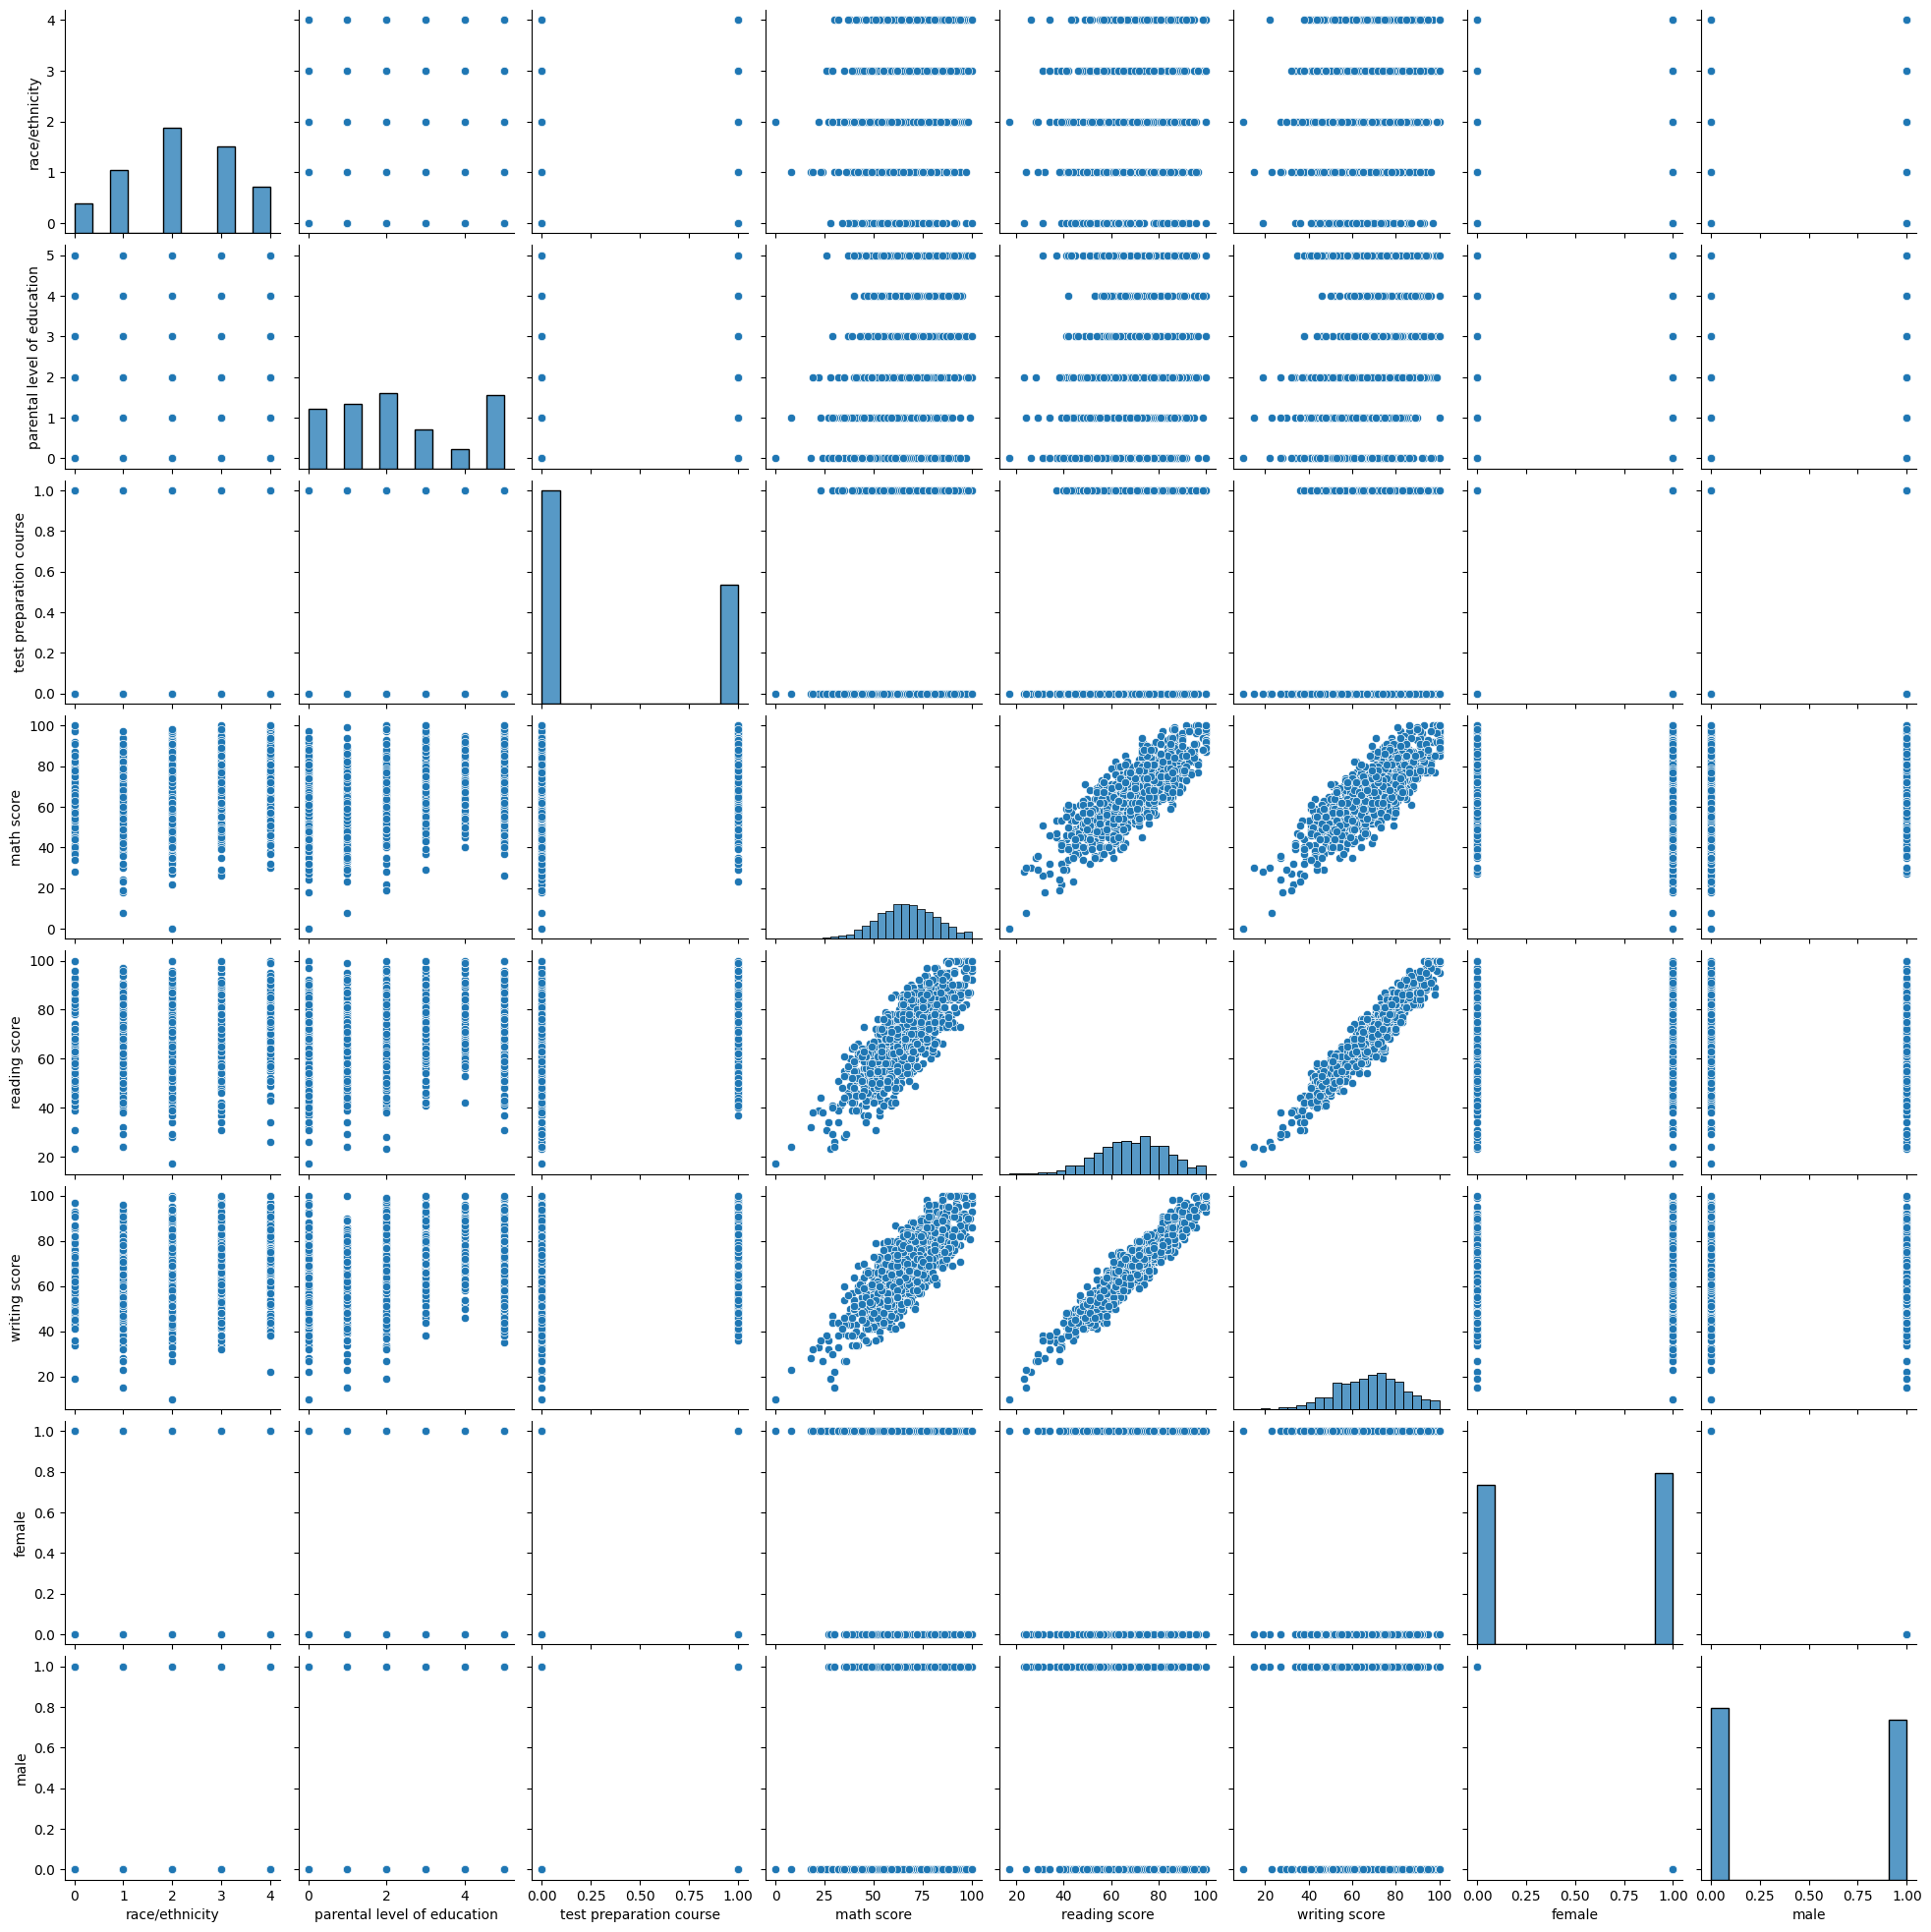

In [22]:
import seaborn as sns
sns.pairplot(data)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [26]:
linear=LinearRegression()
linear.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
y_pred=linear.predict(X_test)

In [28]:
X_train.shape,y_train.shape

((800, 7), (800,))

In [29]:
mae=mean_absolute_error(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)
rmse=np.sqrt(mse)
r2=r2_score(y_pred,y_test)
print(f"MSE:{mse}")
print(f"MAE:{mae}")
print(f"RMSE:{rmse}")
print(f"R2:{r2}")

MSE:29.81046391710808
MAE:4.283580090464817
RMSE:5.459895962113937
R2:0.8640521347402871


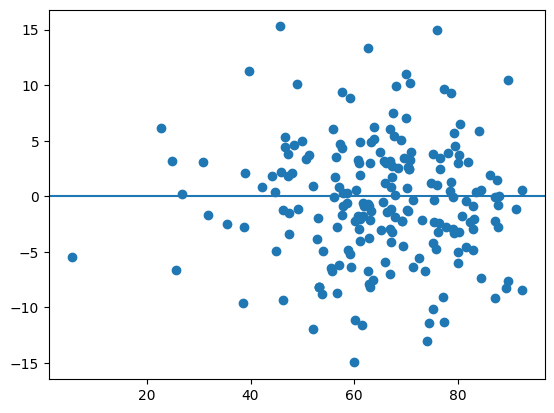

In [30]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.show()


In [31]:
from sklearn.linear_model import Lasso


In [32]:
lasso=Lasso()
lasso.fit(X_train,y_train)
lasso_pred=lasso.predict(X_test)
mae=mean_absolute_error(lasso_pred,y_test)
r2=r2_score(lasso_pred,y_test)
print(f"MAE:{mae}")
print(f"R2:{r2}")


MAE:4.817761627126348
R2:0.7771309533070951


In [33]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train,y_train)


,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [34]:
lassocv_pred=lassocv.predict(X_test)

In [35]:
mae=mean_absolute_error(lassocv_pred,y_test)
mse=mean_squared_error(lassocv_pred,y_test)
rmse=np.sqrt(mse)
r2=r2_score(lassocv_pred,y_test)
print(f"MSE:{mse}")
print(f"MAE:{mae}")
print(f"RMSE:{rmse}")
print(f"R2:{r2}")



MSE:29.805075432799125
MAE:4.281495555133366
RMSE:5.459402479465965
R2:0.8636374312304994


In [36]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)
ridge_ypred=ridge.predict(X_test)

In [37]:
mae=mean_absolute_error(ridge_ypred,y_test)
mse=mean_squared_error(ridge_ypred,y_test)
rmse=np.sqrt(mse)
r2=r2_score(ridge_ypred,y_test)
print(f"MSE:{mse}")
print(f"MAE:{mae}")
print(f"RMSE:{rmse}")
print(f"R2:{r2}")

MSE:29.77009992053812
MAE:4.2784071886518715
RMSE:5.456198302897184
R2:0.8639563573577573


In [38]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train,y_train)
ridgecv_ypred=ridgecv.predict(X_test)

In [39]:
mae=mean_absolute_error(ridgecv_ypred,y_test)
mse=mean_squared_error(ridgecv_ypred,y_test)
rmse=np.sqrt(mse)
r2=r2_score(ridgecv_ypred,y_test)
print(f"MSE:{mse}")
print(f"MAE:{mae}")
print(f"RMSE:{rmse}")
print(f"R2:{r2}")

MSE:29.77009992053812
MAE:4.2784071886518715
RMSE:5.456198302897184
R2:0.8639563573577573


In [40]:
import pickle
scaler

,copy,True
,with_mean,True
,with_std,True


In [41]:
ridge


,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [ ]:
input=[1,3,0,72,72,74,1.0,0.0]

In [ ]:
ridge.predict([[]])

In [42]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

In [ ]:
.kjnlij